<a href="https://colab.research.google.com/github/RafaelSJ0/Aulas-Mack/blob/main/Trilha_4_An%C3%BAncios_Classificados_do_OLX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparando o ambiente

Utilizando o conhecimento obtido na trilha 3, obtivemos mais de 75 mil anuncios classificados na secção de cachorros do site OLX Brasil e está disponivel no link 
[texto do link](https://)

## instalando todas as dependencias

In [ ]:
!pip install pandas
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 4.1 MB/s 


## Abrindo a corpora e fazendo inspenção visual

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/lucianomcsilva/ANUNCIOS_OLX/main/olx.csv')

titles = df[['title']].copy()
display(df)
titles.head(10)

,id,link,title,type,place,price
0,933097516,https://sp.olx.com.br/grande-campinas/animais-...,Bulldog Francês (VARIAS CORES DISPONÍVEIS),NaN,"Rio Claro, Vila Paulista",2200.0
1,933096184,https://sp.olx.com.br/grande-campinas/animais-...,Pug Macho disponível pra entrega,NaN,"Rio Claro, Vila Paulista",1499.0
2,933045767,https://sp.olx.com.br/grande-campinas/animais-...,Lindíssimo filhote de shih tzu machinho Black ...,NaN,"Rio Claro, Centro",NaN
3,933040254,https://sp.olx.com.br/grande-campinas/animais-...,Lindíssimo Filhote de shih tzu machinho com Pe...,NaN,"Rio Claro, Centro",NaN
4,933241268,https://sp.olx.com.br/grande-campinas/animais-...,Filhotes de Rottweiler,NaN,"Piracicaba, Jardim Alvorada",700.0
...,...,...,...,...,...,...
76638,931120490,https://sp.olx.com.br/sao-paulo-e-regiao/anima...,Yorkshire Terrier - Filhotes com Garantias de...,NaN,"São Paulo, Tatuapé",NaN
76639,931120478,https://sp.olx.com.br/sao-paulo-e-regiao/anima...,Maltês - Filhotes com Garantias de saúde em c...,NaN,"São Paulo, Tatuapé",NaN
76640,931120452,https://sp.olx.com.br/sao-paulo-e-regiao/anima...,Beagle - Filhotes com Garantias de saúde em co...,NaN,"São Paulo, Tatuapé",NaN
76641,931119731,https://sp.olx.com.br/sao-paulo-e-regiao/anima...,Border Collie filhotes disponível para entrega...,NaN,"São Paulo, Cidade São Mateus",NaN


,title
0,Bulldog Francês (VARIAS CORES DISPONÍVEIS)
1,Pug Macho disponível pra entrega
2,Lindíssimo filhote de shih tzu machinho Black ...
3,Lindíssimo Filhote de shih tzu machinho com Pe...
4,Filhotes de Rottweiler
5,Rottweiler alto padrão
6,"Yorkshire com pedigree , em loja !!!"
7,Fox Paulistinha alto padrão
8,Filhote de shitzu macho
9,Pug alto padrão


## Nuvem de palavras
Montando uma nuvem de palvras, antes de qualquer pre-tratamento

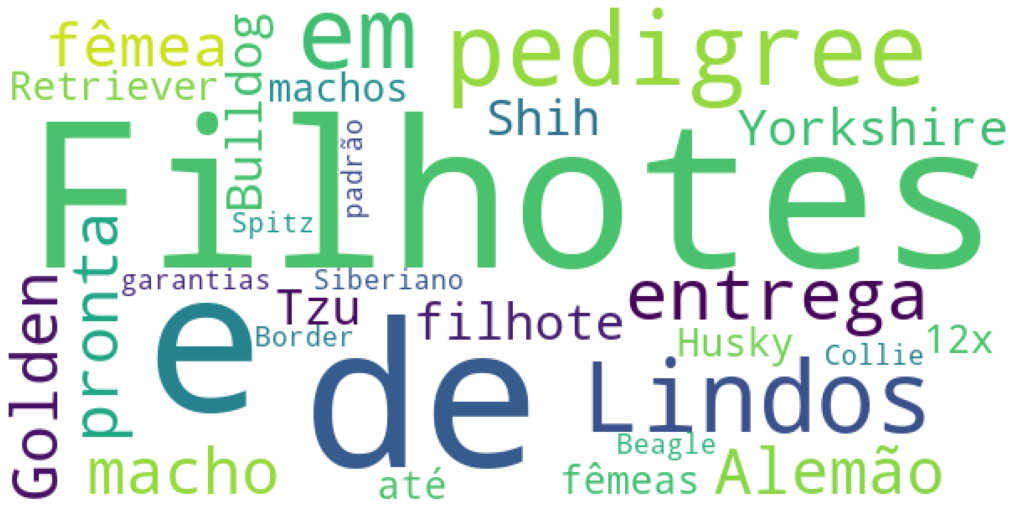

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

original_text = ' '.join(titles['title'])


wordcloud2 = WordCloud(collocations=False, normalize_plurals=False, stopwords=None, width=600, height=300, background_color='white', max_words=30).generate(original_text)
# Generate plot
# plot the WordCloud image                        
plt.figure(figsize = (18, 18), facecolor = 'White') 
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()


# Pré-tratamento
FAzendo os pré-tratamentos explicados no e-book

## Importando a função de singularização

In [ ]:
"""
Thanks for https://simasware.wordpress.com/2014/02/28/pluralizacao-em-pt-br-rails/
"""

import re
import unicodedata
import string

INVARIAVEL = [  'lápis',
                'atlas',
                'pires',
                'ônibus',
                'vírus',
                'bônus',
                'ônus',
                'cais',
                'xis',
                'óculos',
                'ourives',
                'parabéns',
                'atras',
                'frances',
                'ingles',

            ]
def transliterate(string: str) -> str:
    # Copy from inflection Library https://github.com/jpvanhal/inflection
    """
    Replace non-ASCII characters with an ASCII approximation. If no
    approximation exists, the non-ASCII character is ignored. The string must
    be ``unicode``.
    Examples::
        >>> transliterate('älämölö')
        'alamolo'
        >>> transliterate('Ærøskøbing')
        'rskbing'
    """
    normalized = unicodedata.normalize('NFKD', string)

    return normalized.encode('ascii', 'ignore').decode('ascii')

def singularizar(PalavraOriginal):
    """ Remove acentos e deixa tudo minuscula"""
    palavra = PalavraOriginal.lower()

    for wd in INVARIAVEL:
        if transliterate(wd).lower() == palavra:
            return palavra

    """      Lista de regras, composto em tuplas de valor a ser buscado e regra de substituição    """
    rules = []

    """    Palavras terminadas em ns    """
    rules.append((r"^([a-zA-z]*)ns$", r"\1m"))

    """ Palavras terminas em r ou z luzes - luz, flores - flor, arrozes - arroz"""
    rules.append((r"^([a-zA-z]*)res$", r"\1r"))
    rules.append((r"^([a-zA-z]*)zes$", r"\1z"))
    rules.append((r"^([a-zA-z]*)ses$", r"\1s"))

    """    Palavras terminadas em ão    """
    rules.append((r"^([a-zA-z]*)oes$", r"\1ao"))
    rules.append((r"^([a-zA-z]*)aos$", r"\1ao"))
    rules.append((r"^([a-zA-z]*)aes$", r"\1ao"))

    """ Palavras regulares, casos simples: carros, arvores, aboboras"""
    rules.append((r"^([a-zA-z]*)(a|e|o|u)is$", r"\1\2l"))

    """ Palavras terminas em il  cantis - cantil """
    rules.append((r"^([a-zA-z]*)is$", r"\1il"))

    """ Palavras terminas em les  mal - males, mel - meles """
    rules.append((r"^([a-zA-z]*)les$", r"\1l"))


    """ Palavras regulares, casos simples: carros, arvores, aboboras"""
    rules.append((r"^([a-zA-z]*)(a|e|i|o|u)s$", r"\1\2"))
    
    for rule in rules:
        if re.match(rule[0], palavra) is not None:
            return re.sub(rule[0], rule[1], palavra, 1, re.IGNORECASE)
    return palavra

## Aplicando pré-tratamento

In [ ]:
import nltk
from nltk.corpus import stopwords
from unidecode import unidecode
import string
nltk.download('stopwords')

stop = stopwords.words('portuguese')
pd.DataFrame(stop).sample(20)


#Transforma em minuscula e remoção de acentos 
# def funcao_aula(conteudo_linha):
#   return len(conteudo_linha.split())


# def funcao_aula2(conteudo_linha):
#   return ' '.join([word for word in conteudo_linha.split() if word not in (stop)])
#   # lista = [word for word in conteudo_linha.split()]  
#   # print(lista)
#   # retorno = ' '.join([word for word in conteudo_linha.split() if word not in (stop)])
#   # return retorno

# titles['coluna_aula'] = titles['title'].apply(lambda sbrubles: funcao_aula(sbrubles))

# titles['coluna_aula2'] = titles['title'].apply(lambda sbrubles: ' '.join([word for word in sbrubles.split() if word not in (stop)]))

titles['title_treated'] = titles['title'].str.lower().apply(lambda x: unidecode(x))


# remocação de pontuaçao
titles['title_treated'] = titles['title_treated'].str.replace('[{}]'.format(string.punctuation), '')

# remocação de numeros
titles['title_treated'] = titles['title_treated'].str.replace('[{}]'.format(string.digits), '')

# remoção de palavras de parada
titles['title_treated'] = titles['title_treated'].str.lower().apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# Removendo plural
titles['title_treated'] = titles['title_treated'].apply(lambda x: ' '.join([singularizar(word) for word in x.split()]))

titles.sample(20)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: FutureWarning: The default value of regex will change from True to False in a future version.


,title,title_treated
59750,lindos filhotes de shitzu macho não abaixo r$ ...,lindo filhote shitzu macho nao abaixo r macho
25328,Pinscher macho,pinscher macho
12866,"Spitz Alemão, lindos filhotes !",spitz alemao lindo filhote
24327,"Bulldog Inglês CBKC, filhotes disponíveis, vac...",bulldog ingles cbkc filhote disponivel vacinad...
3733,Amáveis filhotes,amavel filhote
12518,Pitbull é só aqui. Reserve agora mesmo o seu n...,pitbull so aqui reserve agora novo membro familia
2551,Husky siberiano com pedigree e micro chip em a...,husky siberiano pedigree micro chip ate x
48909,Adoráveis filhotes de Golden Retriever,adoravel filhote golden retriever
62928,Lindos Filhotes de Rottweiler,lindo filhote rottweiler
53870,Shih Tzu -Verdadeiro Amor,shih tzu verdadeiro amor


## Gerando imagem pós pré-tratamento

### xerentando em forma de tabela primeiro =)

In [ ]:
#cria uma lista com todos os tokens
from nltk.tokenize import word_tokenize
nltk.download('punkt')

big_line = ' '.join(sent for sent in titles['title_treated'])
tokens = word_tokenize(big_line)
fdist1 = nltk.FreqDist(tokens)
dist1 = sorted(fdist1.items(), key=lambda x: x[1], reverse=True)
pd_freq = pd.DataFrame.from_dict(dist1)
n = 100
pd_freq.iloc[n:n+20]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,0,1
100,vida,628
101,informacao,626
102,vacina,620
103,entregamo,608
104,confira,605
105,procedencia,599
106,branco,585
107,adquira,577
108,disposicao,571
109,fisica,570


### Nuvem de palavras

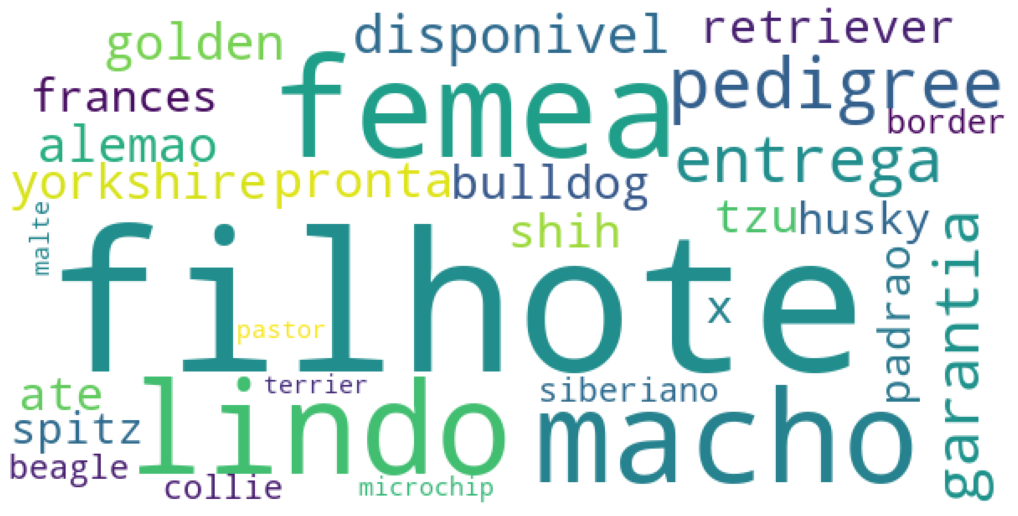

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
# from nltk.tokenize import word_tokenize

treated_text = ' '.join(titles['title_treated'])

wordcloud2 = WordCloud(collocations=False, normalize_plurals=False, stopwords=None, width=600, height=300, background_color='white', max_words=30).generate(treated_text)
# Generate plot
# plot the WordCloud image                        
plt.figure(figsize = (18, 18), facecolor = None) 
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

## Remoção de palavras ignoradas

In [ ]:
ignorewords = [ 'machinho', 'macho', 'machos', 'femea', 'femeas', 'pedigree', 'pronta', 'pronto', 'prontos', 'entrega', 'lindissimo', 'lindissimos', 
                'lindinhos', 'lindinho', 'lindinhas', 'lindinha',  'lindo', 'lindas', 'fofinhos', 'incriveis', 'lindos', 'linda', 'fofos', 'disponiveis', 'disponivel', 'garantia', 'garantias', 'microchip', 'chip', 'saude', 'hoje', 'suporte', 
                'contrato', 'ate', 'padrao', 'raca', 'racas', 'ja', 'loja', 'dias', 'vendo', 'compro', 'vende', 'compra', 'venda', 'veterinario', 'voce', 'maravilhosos', 'promocao', 
                'vacinados', 'c', 'juros', 'whats', 'whatsapp', 'ligue', 'so', 'total', 'gratuito', 'todas', 'todos', 'todo', 'toda', 'saudaveis', 'saudavel', 'todas', 'pra', 'venha', 
                'clinicas', 'informacoes', 'melhores', 'vida', 'entregamos', 'confira', 'procedencia', 'belos', 'entregamos', 'adquira', 'adquirir', 'disposicao', 'veterinaria', 'vet',
                'tamanho', 'vacinas', 'vacinados', 'vacinada', 'adoraveis', 'adoravel', 'assistencia', 'lojas', 'pura', 'porte',  'parcelamos', 'seguranca', 'chamar', 'condicao', 'condicoes', 'polegadas',
                'perfeitos',  'vet', 'top', 'bem', 'melhor', 'cartao', 'casa', 'garanta', 'capa', 'r', 'amigo', 'amor', 'amoroso', 'amorosos', 'super', 'hiper', 'face', 'contato', 'descricao',
                'imediata', 'aqui', 'alexandre', 'belissimos', 'meses', 'conhecer', 'contato', 'novo', 'vez', 'vezes', 'x', 'docil', 'bebe', 'bebes', 'namorada', 'sp', 'sim', 'nao', 'chame', 'info',
                'companhia', 'varias', 'qualidade', 'companhia', 'procuro', 'vermifugado', 'conferir', 'hrs', 'hora', 'horas', 'ainda', 'unica', 'leia', 'veja', 'veje', 'ver', 'alegria', 'feliz',
                'felicidade', 'procura', 'visitar', 'visita', 'conheca', 'fotos', 'ideal', 'proprias', 'reais', 'transporte', 'puros', 'hs', 'oferecemos', 'lar', 'casa', 'apartamento', 'apto', 'apt',
                'oportunidade', 'companheiro', 'belo', 'vendese', 'reserva', 'reserve', 'pelagem', 'excelente', 'brincalhao', 'sonho', 'preco', 'exclusivas', 'exclusivos', 'exclusiva', 'exclusivo',
                'exclusividade', 'exclusividades', 'beneficios', 'pagamento', 'unico', 'unicos', 'unica', 'unicas', 'sonho', 'servicos', 'otimo', 'otimos', 'otima', 'otimas',
                'dia', 'gratis', 'via', 'fofura', 'retirada', 'parcelamento', 'vai', 'chama', 'cinza', 'preto', 'preta', 'branco', 'chocolate', 'cachorro', 'legitimo', 'cabeca', 'ultimo', 'fisica', 'cabeca', 'anao',
               #tamanhos
                'tamanho', 'tamanhos', 'linhagem', 'adulto', 'cm', 'vermifugados', 'vacina', 'canil', 'conosco', 'filhote', 'filhotes', 'filhotinho', 'filhotinhos', 'olhos', 'olho', 'vacinado', 'maravilhoso',
               #cores
                'caramelo', 'amarelo', 'white', 'black', 'vermelho', 'brancochocolate', 'merle', 'merlepreto', 'merlered', 'azul', 'azuis' ]

titles['title_treated_ignored'] = titles['title_treated'].str.lower().apply(lambda x: ' '.join([word for word in x.split() if word not in (ignorewords)]))
titles.sample(20)

,title,title_treated,title_treated_ignored
9762,Frango Galinha 16cm Brinquedo Pet Borracha Mor...,frango galinha cm brinquedo pet borracha morde...,frango galinha brinquedo pet borracha mordedor...
58482,"Samoieda, macho e fêmea com garantias de vida ...",samoieda macho femea garantia vida saude,samoieda
1624,Golden retriever alto padrão,golden retriever alto padrao,golden retriever alto
26919,Maravilhosos filhotes de Labrador,maravilhoso filhote labrador,labrador
43324,Fox Paulistinha alto padrão,fox paulistinha alto padrao,fox paulistinha alto
29514,"Bull Terrier Inglês, em 12x sem juros - vacina...",bull terrier ingles x juro vacinado vermifugado,bull terrier ingles juro
47323,Husky Siberiano -Baby,husky siberiano baby,husky siberiano baby
45795,Husky Siberiano com pedigree e microchip em at...,husky siberiano pedigree microchip ate x,husky siberiano
52860,Ração,racao,racao
6222,Beagle Fêmea bb com 55 dias ja vacinado e verm...,beagle femea bb dia ja vacinado vermifugado,beagle bb


## Xerentando em forma de tabela


In [ ]:
from nltk.tokenize import word_tokenize

#cria uma lista com todos os tokens
big_line = ' '.join(sent for sent in titles['title_treated_ignored'])
tokens = word_tokenize(big_line)
unigram_fd = nltk.FreqDist(tokens)
sorted_ugm = sorted(unigram_fd.items(), key=lambda x: x[1], reverse=True)
tokens_unigram = dict((' '.join(text), count) for text, count in sorted_ugm)  
pd_unigram_df = pd.DataFrame.from_dict(sorted_ugm)
pd_unigram_df.head(30)

,0,1
0,alemao,5718
1,golden,5512
2,yorkshire,4979
3,bulldog,4404
4,tzu,4306
5,shih,4286
6,retriever,4219
7,frances,4065
8,husky,3632
9,spitz,3486


### Nuvem de palavras


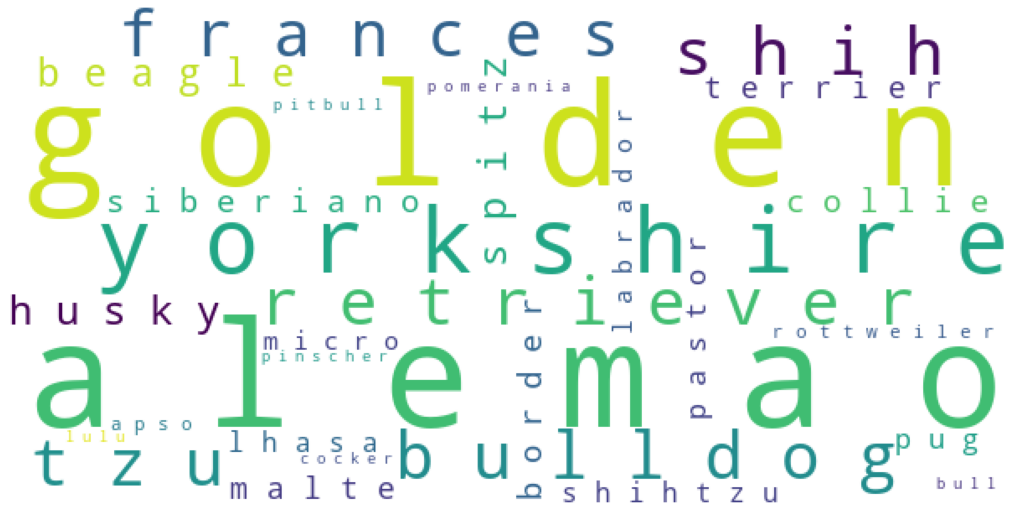

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

treated_text = ' '.join(titles['title_treated_ignored'])

wordcloud2 = WordCloud(collocations=False, normalize_plurals=False, stopwords=None, width=600, height=300, background_color='white', max_words=30).generate_from_frequencies(tokens_unigram)
# Generate plot
# plot the WordCloud image                        
plt.figure(figsize = (18, 18), facecolor = None) 
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

# Bigramas
por fim, para conseguir identificar as raças, vamos trabalhar com bigramas, conforme explicado no e-book


# Gerando os bigramas

In [ ]:
from nltk.collocations import *
from nltk import FreqDist
from nltk.util import ngrams    
import collections

bigram_fd = nltk.FreqDist(nltk.bigrams(word_tokenize(treated_text)))

sorted_bgm = sorted(bigram_fd.items(), key=lambda x: x[1], reverse=True)
tokens_bigram = dict((' '.join(text), count) for text, count in sorted_bgm)
tokens_bigram

{'shih tzu': 4257,
 'golden retriever': 4145,
 'bulldog frances': 3681,
 'husky siberiano': 3391,
 'border collie': 3238,
 'spitz alemao': 3030,
 'lhasa apso': 2217,
 'pastor alemao': 2196,
 'yorkshire terrier': 1842,
 'lulu pomerania': 1254,
 'bull terrier': 1029,
 'american bully': 879,
 'fox paulistinha': 633,
 'cocker spaniel': 515,
 'chow chow': 508,
 'bulldog ingles': 434,
 'beagle polegada': 387,
 'terrier micro': 336,
 'yorkshire micro': 319,
 'rottweiler touro': 301,
 'malte micro': 296,
 'alemao lulu': 261,
 'pastor belga': 248,
 'terrier ingles': 246,
 'poodle toy': 245,
 'sao bernardo': 242,
 'beagle mini': 239,
 'parcelamo juro': 231,
 'bernese mountain': 223,
 'pit bull': 220,
 'poodle micro': 197,
 'buldogue frances': 195,
 'collie blue': 194,
 'frances golden': 189,
 'alemao golden': 186,
 'varia cor': 185,
 'retriever golden': 185,
 'pit monster': 182,
 'retriever bulldog': 178,
 'retriever yorkshire': 169,
 'golden retriver': 166,
 'alemao yorkshire': 165,
 'retriever

## Nuvem de palavras

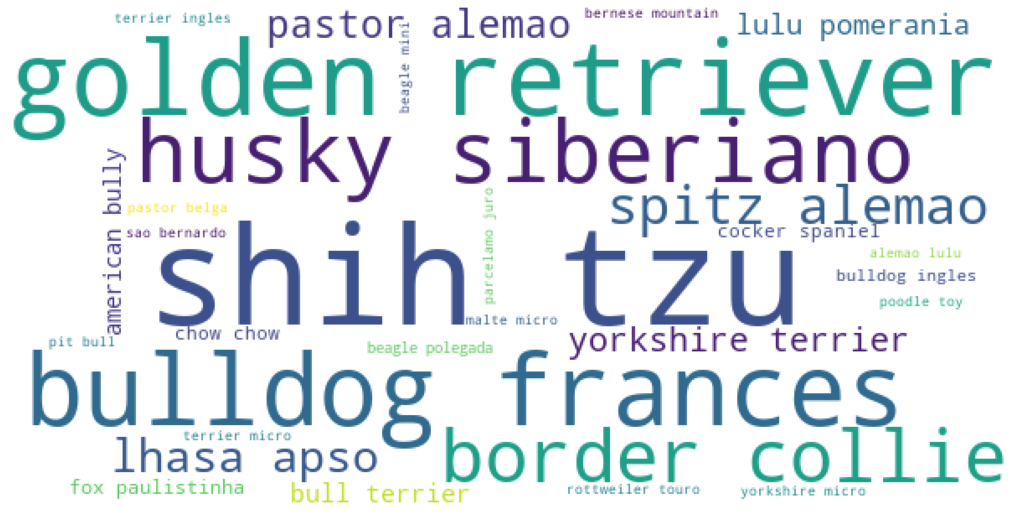

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

wordcloud4 = WordCloud(collocations=False, normalize_plurals=False, stopwords=None, width=600, height=300, background_color='white', max_words=30).generate_from_frequencies(tokens_bigram)
# Generate plot
# plot the WordCloud image                        
plt.figure(figsize = (18, 18), facecolor = None) 
plt.imshow(wordcloud4)
plt.axis("off")
plt.show()

# Bigramas sem ignored words
Gerando bigramas sem remover outras palavras para ver o que aparece

In [ ]:
from nltk.collocations import *
from nltk import FreqDist
from nltk.util import ngrams    
import collections
treated_text = ' '.join(titles['title_treated'])

bigram_fd = nltk.FreqDist(nltk.bigrams(word_tokenize(treated_text)))

sorted_bgm = sorted(bigram_fd.items(), key=lambda x: x[1], reverse=True)
tokens_bigram = dict((' '.join(text), count) for text, count in sorted_bgm)
tokens_bigram

{'pronta entrega': 5479,
 'macho femea': 5066,
 'lindo filhote': 5062,
 'shih tzu': 4257,
 'golden retriever': 4145,
 'ate x': 4007,
 'bulldog frances': 3681,
 'husky siberiano': 3391,
 'border collie': 3236,
 'pedigree microchip': 3108,
 'spitz alemao': 3030,
 'lhasa apso': 2217,
 'microchip ate': 2197,
 'pastor alemao': 2196,
 'yorkshire terrier': 1842,
 'femea disponivel': 1605,
 'garantia saude': 1477,
 'filhote golden': 1413,
 'suporte veterinario': 1342,
 'lulu pomerania': 1249,
 'filhote husky': 1199,
 'filhote lindo': 1176,
 'garantia contrato': 1038,
 'bull terrier': 1029,
 'filhote shih': 1004,
 'maravilhoso filhote': 995,
 'filhote bulldog': 981,
 'filhote rottweiler': 957,
 'micro chip': 902,
 'pedigree micro': 901,
 'american bully': 879,
 'chip ate': 870,
 'filhote yorkshire': 863,
 'filhote disponivel': 847,
 'alto padrao': 832,
 'filhote beagle': 804,
 'x juro': 755,
 'filhote labrador': 747,
 'pronto entrega': 740,
 'femea machinho': 736,
 'ja vacinado': 732,
 'padrao 

## nova nuvem de palavras

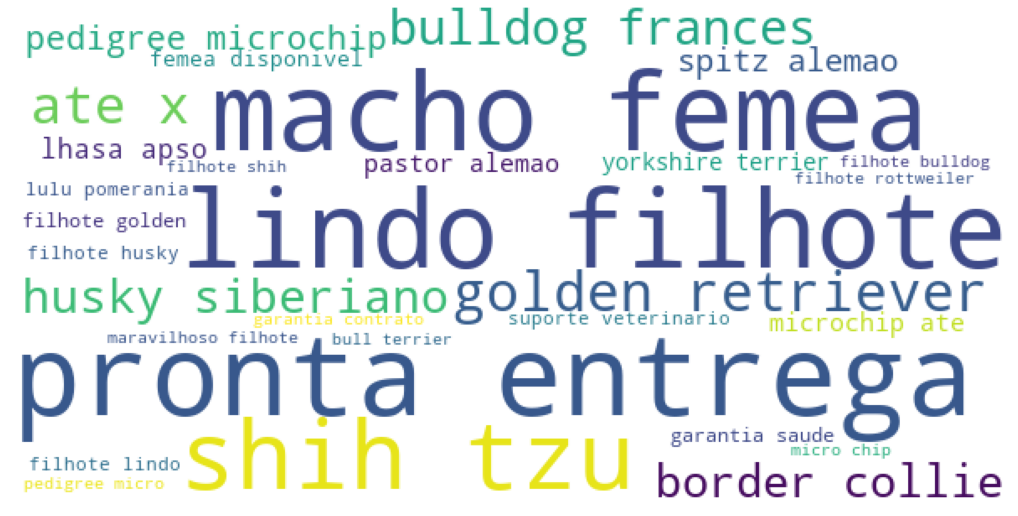

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

wordcloud4 = WordCloud(collocations=False, normalize_plurals=False, stopwords=None, width=600, height=300, background_color='white', max_words=30).generate_from_frequencies(tokens_bigram)
# Generate plot
# plot the WordCloud image                        
plt.figure(figsize = (18, 18), facecolor = None) 
plt.imshow(wordcloud4)
plt.axis("off")
plt.show()

In [ ]:
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.util import ngrams    

#cria uma lista com todos os anúncios concatenados
treated_text = ' '.join(titles['title_treated_ignored'])

# cria o token quebrando por palavras
tokens = word_tokenize(treated_text)

# cria o token por bigrama
bigram_tokens = nltk.bigrams(tokens)

# calcula a frequência, ou seja, quantas vezes cada palavra apareceu
bigram_fd = nltk.FreqDist(bigram_tokens)

# ordena a frequência do maior para o menor
sorted_bgm = sorted(bigram_fd.items(), key=lambda x: x[1], reverse=True)

# Carrega na biblioteca pandas para visualizar melhor
pd_bigram_df = pd.DataFrame.from_dict(sorted_bgm)

# Apresenta as 30 palavras mais frequentes (desenhada na nuvem de palavras)
pd_bigram_df.head(30)


,0,1
0,"(shih, tzu)",4257
1,"(golden, retriever)",4145
2,"(bulldog, frances)",3681
3,"(husky, siberiano)",3391
4,"(border, collie)",3238
5,"(spitz, alemao)",3030
6,"(lhasa, apso)",2217
7,"(pastor, alemao)",2196
8,"(yorkshire, terrier)",1842
9,"(lulu, pomerania)",1252
